In [1]:
!pip install Qiskit ipywidgets
!pip install qiskit
!pip install qiskit_optimization
!pip install qiskit-optimization
!pip install cplex
!pip install ibm-quantum-widgets
!pip install docplex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
#provider = IBMQ.load_account()

In [3]:
import time
from typing import List, Optional, Any
import numpy as np
import matplotlib.pyplot as plt

from docplex.mp.model import Model

from qiskit import BasicAer
from qiskit.algorithms import QAOA, NumPyMinimumEigensolver
from qiskit_optimization.algorithms import CobylaOptimizer, MinimumEigenOptimizer
from qiskit_optimization.problems import QuadraticProgram
from qiskit_optimization.algorithms.admm_optimizer import ADMMParameters, ADMMOptimizer
from qiskit_optimization.translators import from_docplex_mp

from qiskit.utils.algorithm_globals import algorithm_globals
algorithm_globals.massive=True

# If CPLEX is installed, you can uncomment this line to import the CplexOptimizer.
# CPLEX can be used in this tutorial to solve the convex continuous problem,
# but also as a reference to solve the QUBO, or even the full problem.
#
# from qiskit.optimization.algorithms import CplexOptimizer

In [4]:
# define COBYLA optimizer to handle convex continuous problems.
cobyla = CobylaOptimizer()

# define QAOA via the minimum eigen optimizer
qaoa = MinimumEigenOptimizer(QAOA(quantum_instance=BasicAer.get_backend("statevector_simulator")))

# exact QUBO solver as classical benchmark
exact = MinimumEigenOptimizer(NumPyMinimumEigensolver())  # to solve QUBOs

# in case CPLEX is installed it can also be used for the convex problems, the QUBO,
# or as a benchmark for the full problem.
#
# cplex = CplexOptimizer()

In [5]:
# construct model using docplex
mdl = Model("ex7")

#server = M = 3 = i = i0, i1, i2
#virtual machine = N = 3 = j = j0, j1, j2
#all servers have the same idle and dynamic power consumption
#all servers have the same maximum cpu capacity

si0 = 1#mdl.binary_var(name="si0")
si1 = 1#mdl.binary_var(name="si1")
si2 = 1#mdl.binary_var(name="si2")
#si3 = mdl.binary_var(name="si3")
#si4 = mdl.binary_var(name="si4")


vj0i0 = mdl.binary_var(name="vj0i0")
vj1i0 = mdl.binary_var(name="vj1i0")
vj2i0 = mdl.binary_var(name="vj2i0")
#vj3i0 = mdl.binary_var(name="vj3i0")
#vj4i0 = mdl.binary_var(name="vj4i0")
vj0i1 = mdl.binary_var(name="vj0i1")
vj1i1 = mdl.binary_var(name="vj1i1")
vj2i1 = mdl.binary_var(name="vj2i1")
#vj3i1 = mdl.binary_var(name="vj3i1")
#vj4i1 = mdl.binary_var(name="vj4i1")
vj0i2 = mdl.binary_var(name="vj0i2")
vj1i2 = mdl.binary_var(name="vj1i2")
vj2i2 = mdl.binary_var(name="vj2i2")
#vj3i2 = mdl.binary_var(name="vj3i2")
#vj4i2 = mdl.binary_var(name="vj4i2")
vj0i3 = mdl.binary_var(name="vj0i3")
vj1i3 = mdl.binary_var(name="vj1i3")
vj2i3 = mdl.binary_var(name="vj2i3")
#vj3i3 = mdl.binary_var(name="vj3i3")
#vj4i3 = mdl.binary_var(name="vj4i3")
vj0i4 = mdl.binary_var(name="vj0i4")
vj1i4 = mdl.binary_var(name="vj1i4")
vj2i4 = mdl.binary_var(name="vj2i4")
#vj3i4 = mdl.binary_var(name="vj3i4")
#vj4i4 = mdl.binary_var(name="vj4i4")

#pi = mdl.continuous_var(name="pi")
#pd = mdl.continuous_var(name="pd")
#pi = mdl.binary_var(name="pi")
#pd = mdl.binary_var(name="pd")
pi = 10
pd = 5

ci0 = 100
ci1 = 110
ci2 = 100
#ci3 = 110
#ci4 = 120

uj0 = 60;
uj1 = 80;
uj2 = 70
#scrivere un admm optimmizer e print per debug di variabili
#impostare come parametri U
#uj0 = mdl.integer_var(name="uj0")
#uj1 = mdl.integer_var(name="uj1")
#uj2 = mdl.integer_var(name="uj2")
#uj3 = mdl.integer_var(name="uj3")
#uj4 = mdl.integer_var(name="uj4")

In [6]:
sum0 = (vj0i0+vj1i0+vj2i0)#+vj3i0)#+vj4i0)
sum1 = (vj0i1+vj1i1+vj2i1)#+vj3i1)#+vj4i1)
sum2 = (vj0i2+vj1i2+vj2i2)#+vj3i2)#+vj4i2)
#sum3 = (vj0i3+vj1i3+vj2i3+vj3i3)#+vj4i3)
#sum4 = (vj0i4+vj1i4+vj2i4+vj3i4)#+vj4i4)
sum5 = (vj0i0+vj0i1+vj0i2)#+vj0i3)#+vj0i4)
sum6 = (vj1i0+vj1i1+vj1i2)#+vj1i3)#+vj1i4)
sum7 = (vj2i0+vj2i1+vj2i2)#+vj2i3)#+vj2i4)
#sum8 = (vj3i0+vj3i1+vj3i2)#+vj3i3)#+vj3i4)
#sum9 = (vj4i0+vj4i1+vj4i2)#+vj4i3)#+vj4i4)

In [7]:
#mdl.minimize((pi*si0+pd*(uj0*sum0))+(pi*si1+pd*(uj1*sum1))+(pi*si2+pd*(uj2*sum2)))
#mdl.minimize(sum5)#+sum6+sum7)
#mdl.minimize(pi*si0+pd*(uj0*(vj0i0+vj1i0+vj2i0))+pi*si1+pd*(uj0*(vj0i1+vj1i1+vj2i1))+pi*si2+pd*(uj0*(vj0i2+vj1i2+vj2i2)))
mdl.minimize(pi*si0+pd*uj0*(vj0i0+vj1i0+vj2i0)+pi*si1+pd*uj1*(vj0i1+vj1i1+vj2i1)+pi*si2+pd*uj2*(vj0i2+vj1i2+vj2i2))
#mdl.add_constraint(uj0*sum0 <= ci0*si0, "cons0")
#mdl.add_constraint(uj1*sum1 <= ci1*si1, "cons1")
#mdl.add_constraint(uj2*sum2 <= ci2*si2, "cons2")
#mdl.add_constraint(sum3 <= ci3*si3, "cons3")
#mdl.add_constraint(sum4 <= ci4*si4, "cons4")
mdl.add_constraint((vj0i0+vj1i0+vj2i0) == 1.0, "cons5")
mdl.add_constraint((vj0i1+vj1i1+vj2i1) == 1.0, "cons6")
mdl.add_constraint((vj0i2+vj1i2+vj2i2) == 1.0, "cons7")
#mdl.add_constraint(sum8 == 1, "cons8")
#mdl.add_constraint(sum9 == 1, "cons9")
#mdl.add_constraint(uj0 <= ci0, "cons10")
#mdl.add_constraint(uj1 <= ci1, "cons11")
#mdl.add_constraint(uj2 <= ci2, "cons12")
#mdl.add_constraint(uj3 <= ci3, "cons13")
#mdl.add_constraint(uj4 <= ci4, "cons14")
#mdl.add_constraint(uj0 >= 1, "cons15")
#mdl.add_constraint(uj1 >= 1, "cons16")                  
#mdl.add_constraint(uj2 >= 1, "cons17")
#mdl.add_constraint(uj3 >= 1, "cons18")
#mdl.add_constraint(uj4 >= 1, "cons19")
#mdl.add_constraint(si0 == 1, "cons20")
#mdl.add_constraint(si1 == 1, "cons21")                  
#mdl.add_constraint(si2 == 1, "cons22")
#mdl.add_constraint(si3 >= 1, "cons23")
#mdl.add_constraint(si4 >= 1, "cons24")

docplex.mp.LinearConstraint[cons7](vj0i2+vj1i2+vj2i2,EQ,1.0)

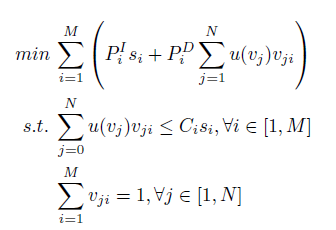

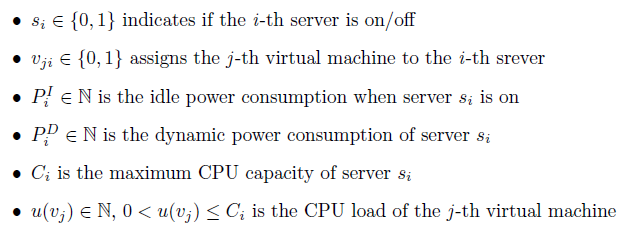

In [8]:
# load quadratic program from docplex model
qp = from_docplex_mp(mdl)
print(qp.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: ex7

Minimize
 obj: 300 vj0i0 + 300 vj1i0 + 300 vj2i0 + 400 vj0i1 + 400 vj1i1 + 400 vj2i1
      + 350 vj0i2 + 350 vj1i2 + 350 vj2i2 + 30
Subject To
 cons5: vj0i0 + vj1i0 + vj2i0 = 1
 cons6: vj0i1 + vj1i1 + vj2i1 = 1
 cons7: vj0i2 + vj1i2 + vj2i2 = 1

Bounds
 0 <= vj0i0 <= 1
 0 <= vj1i0 <= 1
 0 <= vj2i0 <= 1
 0 <= vj0i1 <= 1
 0 <= vj1i1 <= 1
 0 <= vj2i1 <= 1
 0 <= vj0i2 <= 1
 0 <= vj1i2 <= 1
 0 <= vj2i2 <= 1
 0 <= vj0i3 <= 1
 0 <= vj1i3 <= 1
 0 <= vj2i3 <= 1
 0 <= vj0i4 <= 1
 0 <= vj1i4 <= 1
 0 <= vj2i4 <= 1

Binaries
 vj0i0 vj1i0 vj2i0 vj0i1 vj1i1 vj2i1 vj0i2 vj1i2 vj2i2 vj0i3 vj1i3 vj2i3 vj0i4
 vj1i4 vj2i4
End



In [9]:
admm_params = ADMMParameters(
                            rho_initial=1001,
                            beta=1000,
                            factor_c=900,
                            maxiter=100,
                            three_block=True, tol=1.e-6
                        )

In [10]:
# define QUBO optimizer
qubo_optimizer = exact
# qubo_optimizer = cplex  # uncomment to use CPLEX instead

# define classical optimizer
convex_optimizer = cobyla
# convex_optimizer = cplex  # uncomment to use CPLEX instead

# initialize ADMM with classical QUBO and convex optimizer
admm = ADMMOptimizer(params=admm_params,
                     qubo_optimizer=qubo_optimizer,
                     continuous_optimizer=convex_optimizer,
                    )

In [14]:
# run ADMM to solve problem
#%tb
%timeit
result = admm.solve(qp)

In [15]:
print("x={:}".format(result.x))
print("fval={:.7f}".format(result.fval))
print("x={:}".format(result.state.residuals))

x=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
fval=30.0000000
x=[0.00012100438191378756, 0.00013762630382219853, 0.00016957937738011048, 0.0001541128141836207, 0.00017553400554548543, 0.00016762564377012667, 0.0001958826099472485, 0.00014700928484771204, 0.000217077433783288, 0.00022179721019649907, 0.00013400802949844936, 0.000182041534577625, 0.00017266173545635007, 0.00022881924943504576, 0.0001482513689267976, 0.00018656636150077836, 0.00021542171348698234, 0.00019004653153545826, 0.0001673705316269253, 0.00018640272459083168, 0.00024319125482803806, 0.00015264998070024276, 0.00023366485763876355, 0.00020554322130313546, 0.00020547339697104272, 0.00014769962138614666, 0.00017425499736796717, 0.0001898833825629476, 0.0001726815715572107, 0.0002349061748302923, 0.00023018842957703772, 0.00019519487090170683, 0.00020719470419412465, 0.0002000257829036296, 0.00011209249130584324, 0.00014965710263164383, 0.00016229464434182333, 0.00015958696299319376, 0.00016053568188071363, 0.000176

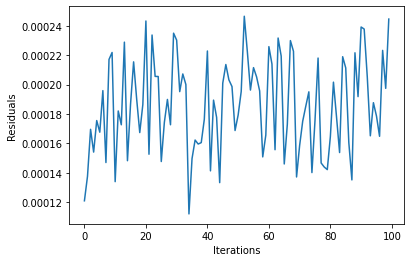

In [16]:
plt.plot(result.state.residuals)
plt.xlabel("Iterations")
plt.ylabel("Residuals")
plt.show()

In [17]:
lista = []
lista = result.state.residuals

In [18]:
result

<ADMMOptimizationResult: fval=30.0, vj0i0=0.0, vj1i0=0.0, vj2i0=0.0, vj0i1=0.0, vj1i1=0.0, vj2i1=0.0, vj0i2=0.0, vj1i2=0.0, vj2i2=0.0, vj0i3=0.0, vj1i3=0.0, vj2i3=0.0, vj0i4=0.0, vj1i4=0.0, vj2i4=0.0, status=INFEASIBLE>

In [19]:
print(result)

fval=30.0, vj0i0=0.0, vj1i0=0.0, vj2i0=0.0, vj0i1=0.0, vj1i1=0.0, vj2i1=0.0, vj0i2=0.0, vj1i2=0.0, vj2i2=0.0, vj0i3=0.0, vj1i3=0.0, vj2i3=0.0, vj0i4=0.0, vj1i4=0.0, vj2i4=0.0, status=INFEASIBLE


In [20]:
lista

[0.00012100438191378756,
 0.00013762630382219853,
 0.00016957937738011048,
 0.0001541128141836207,
 0.00017553400554548543,
 0.00016762564377012667,
 0.0001958826099472485,
 0.00014700928484771204,
 0.000217077433783288,
 0.00022179721019649907,
 0.00013400802949844936,
 0.000182041534577625,
 0.00017266173545635007,
 0.00022881924943504576,
 0.0001482513689267976,
 0.00018656636150077836,
 0.00021542171348698234,
 0.00019004653153545826,
 0.0001673705316269253,
 0.00018640272459083168,
 0.00024319125482803806,
 0.00015264998070024276,
 0.00023366485763876355,
 0.00020554322130313546,
 0.00020547339697104272,
 0.00014769962138614666,
 0.00017425499736796717,
 0.0001898833825629476,
 0.0001726815715572107,
 0.0002349061748302923,
 0.00023018842957703772,
 0.00019519487090170683,
 0.00020719470419412465,
 0.0002000257829036296,
 0.00011209249130584324,
 0.00014965710263164383,
 0.00016229464434182333,
 0.00015958696299319376,
 0.00016053568188071363,
 0.0001764104143122239,
 0.0002228060

In [ ]:
import statistics
print(statistics.median(lista))

In [ ]:
result.state

<qiskit_optimization.algorithms.admm_optimizer.ADMMState at 0x7f139d9c9a10>

In [ ]:
result.state.residuals

[0.00012141369162106502,
 0.0001598523981620667,
 0.0001363096183023072,
 0.00013366164218028267,
 0.00019449940125445926,
 0.00024421444450206735,
 0.00025167611916002527,
 0.00021537106591262232,
 0.00017643815976730237,
 0.00020383167704402593,
 0.00020170300246574247,
 0.000206931492765146,
 0.00018333844684891904,
 0.00021713388762022385,
 0.00020994328184666586,
 0.00024296944946516823,
 0.00024457664693026417,
 0.0002482295854048988,
 0.00018674532898820407,
 0.00019769590967444976,
 0.00019411858974276858,
 0.00024375739869511538,
 0.0002089992531592181,
 0.00020951181251973,
 0.0002483011004500093,
 0.0002250386902197582,
 0.00016766718356675924,
 0.00018897679470788073,
 0.00021242228282042198,
 0.00016713528881829182,
 0.00018282550408267565,
 0.00020721244869612994,
 0.00021869402792425632,
 0.00022081927154776182,
 0.00022754474554158595,
 0.00020706677412881896,
 0.00022560653748116146,
 0.00019025344701929618,
 0.0002385655425094464,
 0.00021635261763172078,
 0.00015843035492153822,
 0.00023195609359490414,
 0.0001720417937579681,
 0.0002204567297929457,
 0.00020705422902170338,
 0.00022724698997758188,
 0.0001886879055553237,
 0.00016933489224124583,
 0.00023193334781205417,
 0.00024620261401048693,
 0.00021665867994080212,
 0.00017219817427995945,
 0.0002075162072621998,
 0.00019728938796329234,
 0.0002028710199885681,
 0.0002199754406369366,
 0.00021008534603531942,
 0.0002331317949101826,
 0.00018383408521425608,
 0.00016520636586350823,
 0.00017108218707767957,
 0.00020963499258483986,
 0.0002223718285616617,
 0.0001977060669191568,
 0.00021587937372126003,
 0.0002284688515442429,
 0.00024385221917543986,
 0.00022164365397135498,
 0.0002339541056982006,
 0.00023184329593895061,
 0.00019166237528336544,
 0.00012148903950409603,
 0.0002023643240921501,
 0.00020890726059580848,
 0.00017840574866187555,
 0.00023026937836401358,
 0.0002077260937902401,
 0.0002160060175027085,
 0.00020155481028227344,
 0.00016570810369272447,
 0.0002154519837066465,
 0.0002047177186078402,
 0.00022776723077289258,
 0.0002004791382536291,
 0.00019532522431252858,
 0.0001965864008870737,
 0.00024713351166330756,
 0.0002225147745767656,
 0.00023356609090968112,
 0.00018672295206642652,
 0.00017706244697246435,
 0.0002312611336018245,
 0.00016143810647910342,
 0.00017801328530882057,
 0.00023217463560229267,
 0.00016807407152833376,
 0.00019893348274143088,
 0.00018770003833946695,
 0.00013960812242918945,
 0.0001762894637224225]

In [ ]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright